In [1]:
import pandas as pd
import os 
import numpy as np
import scipy as sp
import scipy.stats as stats
import Bio
import rpy2
%load_ext rpy2.ipython

In [2]:
%%R

###
library(SingleCellExperiment)
library(scater)
library(SC3)
options(stringsAsFactors = FALSE)
library(gridExtra)
library(grid)
library(stringr)
library(scImpute)
library(SummarizedExperiment)
###readin1
scdata <- readRDS("scImpute_all_k55/parental_removed.rds")

/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: SummarizedExperiment

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenomicRanges

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/johnny/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack

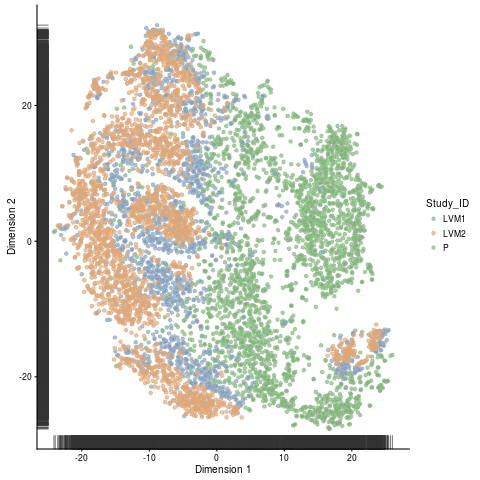

In [3]:
%%R
###plot TSNE
plotTSNE(
    scdata,
    colour_by = "Study_ID"
)

# Visualize density based on P = 1, LVM1 = 2, LVM2 = 3

In [4]:
%%R
#####read in TSNE calculated data
TSNE <- data.frame(reducedDim(scdata, "TSNE"))
####add in sample data
TSNE$sample <- colData(scdata)$Study_ID
####read LVM1, LVM2 into unique dataframes
LVM1 <- subset(TSNE, sample == 'LVM1')
LVM2 <- subset(TSNE, sample == 'LVM2')
####append LVM1 and LVM2 to TSNE to do "weighting" (quickie method)
####LVM1 is weighted = 2, so +1
TSNE <- rbind(TSNE,LVM1)
####LVM2 is weighted = 3, so +2
TSNE <- rbind(TSNE,LVM2)
TSNE <- rbind(TSNE,LVM2)
print(dim(TSNE))

[1] 14283     3


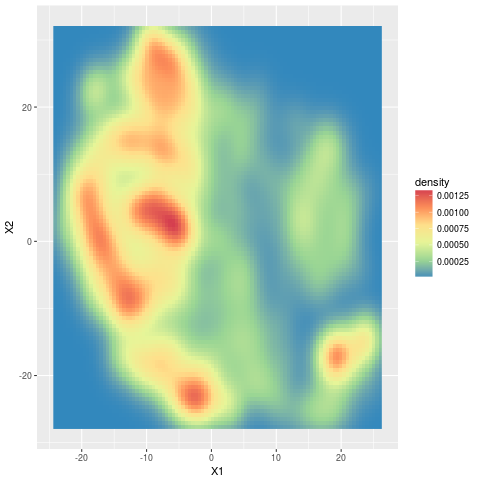

In [5]:
%%R

###
d <- ggplot(TSNE, aes(X1, X2))+ 
stat_density_2d(geom = "raster", aes(fill = ..density..), contour = FALSE)  
d + scale_fill_distiller(palette = "Spectral")

# Visualize density based on P = 3, LVM1 = 2, LVM2 = 1

In [6]:
%%R
#####read in TSNE calculated data
TSNE <- data.frame(reducedDim(scdata, "TSNE"))
####add in sample data
TSNE$sample <- colData(scdata)$Study_ID
####read LVM1, LVM2 into unique dataframes
P <- subset(TSNE, sample == 'P')
LVM1 <- subset(TSNE, sample == 'LVM1')
####append LVM1 and LVM2 to TSNE to do "weighting" (quickie method)
####LVM1 is weighted = 2, so +1
TSNE <- rbind(TSNE,LVM1)
####P is weighted = 3, so +2
TSNE <- rbind(TSNE,P)
TSNE <- rbind(TSNE,P)
print(dim(TSNE))

[1] 15141     3


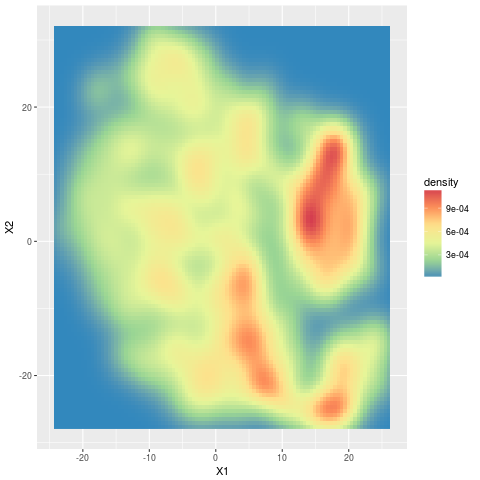

In [7]:
%%R

###
d <- ggplot(TSNE, aes(X1, X2))+ 
stat_density_2d(geom = "raster", aes(fill = ..density..), contour = FALSE)  
d + scale_fill_distiller(palette = "Spectral")